In [1]:
# ------------------------------------------
# Step 1: Data Collection
# ------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Set Seaborn style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("sales.csv")

# Display the first 5 rows of the dataset
print("First 5 rows of dataset:")
df.head()

First 5 rows of dataset:


,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2


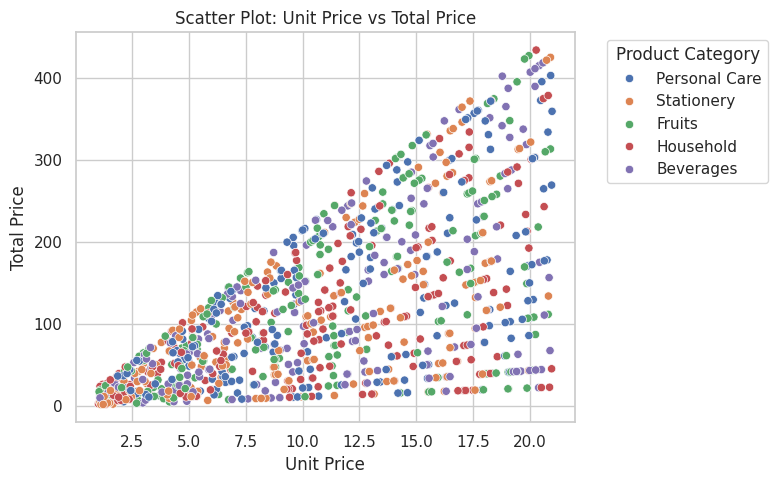

In [2]:
# ------------------------------------------
# Step 2: Data Visualization
# ------------------------------------------

# 1. Scatter Plot: Unit Price vs Total Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='unit_price', y='total_price', data=df, hue='product_category')
plt.title('Scatter Plot: Unit Price vs Total Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Price')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


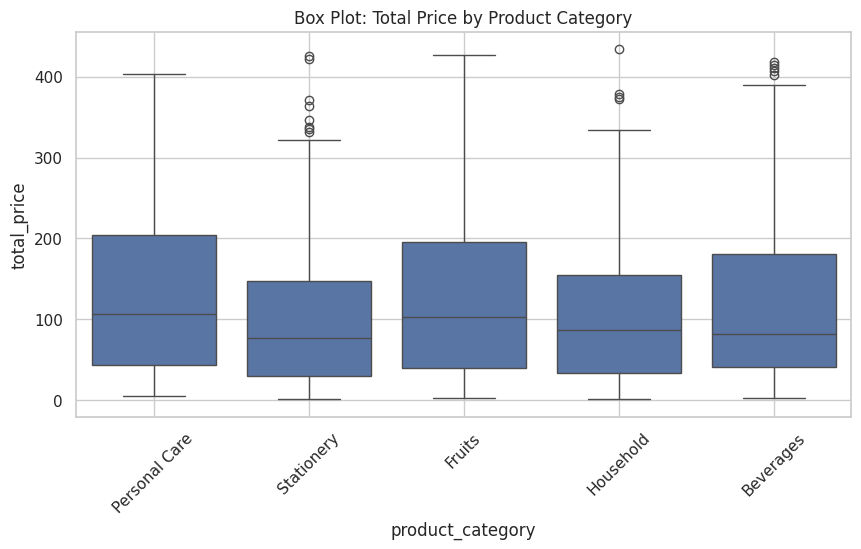

In [3]:
# 2. Box Plot: Total Price by Product Category
plt.figure(figsize=(10, 5))
sns.boxplot(x='product_category', y='total_price', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot: Total Price by Product Category')
plt.grid(True)
plt.show()

In [4]:
# ------------------------------------------
# Step 3: Data Preprocessing
# ------------------------------------------

# 1. Handling Missing Values
print("Missing Values (Before):")
print(df.isnull().sum())

# Fill missing numerical values with mean (if any)
df_cleaned = df.fillna(df.mean(numeric_only=True))

print("\nMissing Values (After):")
print(df_cleaned.isnull().sum())

Missing Values (Before):
sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64

Missing Values (After):
sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64


In [5]:
# 2. Outlier Detection and Removal using IQR

# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):")
print(IQR)

Interquartile Range (IQR):
sale_id          499.5000
unit_price        10.0150
quantity          11.0000
tax                9.0125
total_price      137.6925
reward_points     10.0000
dtype: float64


In [6]:
# Identify and remove outliers
# Create a boolean mask for rows without outliers
condition = ~((df_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) |
              (df_cleaned[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply mask to dataframe
df_no_outliers = df_cleaned[condition]

print("Data Shape After Outlier Removal:", df_no_outliers.shape)

Data Shape After Outlier Removal: (928, 12)


In [7]:
# 3. Data Reduction
# Sample 80% of dataset
df_sampled = df_no_outliers.sample(frac=0.8, random_state=42)

# Drop irrelevant columns
columns_to_drop = ['sale_id', 'customer_type']
df_reduced = df_sampled.drop(columns=columns_to_drop)
print("Columns Dropped:", columns_to_drop)
print("Data Shape After Reduction:", df_reduced.shape)

Columns Dropped: ['sale_id', 'customer_type']
Data Shape After Reduction: (742, 10)


In [8]:
# 4. Data Scaling and Discretization
# Min-Max Scaling
scaler = MinMaxScaler()
scaled_columns = ['unit_price', 'quantity', 'tax', 'total_price']
df_scaled = df_reduced.copy()
df_scaled[scaled_columns] = scaler.fit_transform(df_reduced[scaled_columns])

# Discretize 'Unit price' into 3 bins
df_scaled['Price Bin'] = pd.cut(df_scaled['unit_price'], bins=3, labels=['Low', 'Medium', 'High'])
print("Data After Scaling and Discretization:")
df_scaled.head()

Data After Scaling and Discretization:


,branch,city,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points,Price Bin
805,A,Chicago,Female,Orange Juice,Fruits,0.331996,1.000000,0.437887,0.437851,0,Low
711,A,Chicago,Male,Shampoo,Stationery,0.848044,0.526316,0.566240,0.566199,21,High
33,B,Los Angeles,Male,Orange Juice,Household,0.356570,0.421053,0.207594,0.207802,0,Medium
418,A,New York,Male,Detergent,Household,0.983450,0.526316,0.652084,0.651998,0,High
210,A,Chicago,Female,Notebook,Stationery,0.760281,0.736842,0.697482,0.697543,25,High


In [9]:
# ------------------------------------------
# Step 4: Statistical Analysis
# ------------------------------------------

# 1. General Overview of Data
print("Data Info:")
df_scaled.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 805 to 953
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   branch            742 non-null    object  
 1   city              742 non-null    object  
 2   gender            742 non-null    object  
 3   product_name      742 non-null    object  
 4   product_category  742 non-null    object  
 5   unit_price        742 non-null    float64 
 6   quantity          742 non-null    float64 
 7   tax               742 non-null    float64 
 8   total_price       742 non-null    float64 
 9   reward_points     742 non-null    int64   
 10  Price Bin         742 non-null    category
dtypes: category(1), float64(4), int64(1), object(5)
memory usage: 64.6+ KB


In [10]:
print("Data Description:")
df_scaled.describe()

Data Description:


,unit_price,quantity,tax,total_price,reward_points
count,742.000000,742.000000,742.000000,742.000000,742.000000
mean,0.471364,0.458008,0.273353,0.273478,4.405660
std,0.279319,0.308164,0.220503,0.220481,6.653046
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230441,0.210526,0.092138,0.092326,0.000000
50%,0.455868,0.421053,0.218118,0.218224,0.000000
75%,0.703862,0.736842,0.407346,0.407559,7.000000
max,1.000000,1.000000,1.000000,1.000000,25.000000


In [11]:
# 2. Central Tendency Measures
print("Central Tendency Measures:")
print("Minimum:", df['total_price'].min())
print("Maximum:", df['total_price'].max())
print("Mean:", df['total_price'].mean())
print("Median:", df['total_price'].median())
print("Mode:", df['total_price'].mode()[0])

Central Tendency Measures:
Minimum: 1.21
Maximum: 433.99
Mean: 118.5839
Median: 89.705
Mode: 60.67


In [12]:
# 3. Dispersion Measures
print("Dispersion Measures:")
print("Range:", df['total_price'].max() - df['total_price'].min())
print("Q1:", df['total_price'].quantile(0.25))
print("Q3:", df['total_price'].quantile(0.75))
print("IQR:", df['total_price'].quantile(0.75) - df['total_price'].quantile(0.25))
print("Variance:", df['total_price'].var())
print("Standard Deviation:", df['total_price'].std())

Dispersion Measures:
Range: 432.78000000000003
Q1: 38.38
Q3: 176.0725
IQR: 137.6925
Variance: 9987.292232822818
Standard Deviation: 99.93644096535967


In [13]:
# 4. Correlation Matrix
print("Correlation Matrix:")
print(df_scaled.corr(numeric_only=True))

Correlation Matrix:
               unit_price  quantity       tax  total_price  reward_points
unit_price       1.000000 -0.159173  0.522457     0.522471       0.212388
quantity        -0.159173  1.000000  0.657088     0.657087       0.294773
tax              0.522457  0.657088  1.000000     1.000000       0.382926
total_price      0.522471  0.657087  1.000000     1.000000       0.382910
reward_points    0.212388  0.294773  0.382926     0.382910       1.000000
